In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
ls 'gdrive/My Drive/left_fist.npy'

'gdrive/My Drive/left_fist.npy'


In [0]:
left_fist = np.load('gdrive/My Drive/left_fist.npy')
right_fist = np.load('gdrive/My Drive/right_fist.npy')
both_fist = np.load('gdrive/My Drive/both_fist.npy')
both_feet = np.load('gdrive/My Drive/both_feet.npy')

In [6]:
left_fist = np.array(left_fist[:530])
right_fist = np.array(right_fist[:530])
both_fist = np.array(both_fist)
both_feet = np.array(both_feet)
print(left_fist.shape)
print(right_fist.shape)
print(both_fist.shape)
print(both_feet.shape)

(530, 64, 113)
(530, 64, 113)
(530, 64, 113)
(530, 64, 113)


In [7]:
print(abs(np.sum(left_fist[0][0] - right_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_feet[0][0])))
print(abs(np.sum(both_feet[0][0] - both_fist[0][0])))

6.853359500868575e-07
1.6039158473338503e-05
3.0591367277883825e-05
1.4552208804545327e-05


In [0]:
events = np.zeros((2120,4))
ones = np.ones((530,))

# left fist
events[:530,0] = events[:530,0] + ones
# right fist
events[530:1060,1] = events[530:1060,1] + ones
# both fist 
events[1060:1590,2] = events[1060:1590,2] + ones
# both feet
events[1590:,3] = events[1590:,3] + ones

In [0]:
def preprocessing(data):
    mean = np.mean(data, axis = 0)    
    var = np.var(data, axis = 0)
    data = (data - mean)/var
    return data
#data_array = preprocessing(data)

In [0]:
left_fist1 = abs(left_fist.reshape((530, 7232)))
right_fist1 = abs(right_fist.reshape((530, 7232)))
both_fist1 = abs(both_fist.reshape((530, 7232)))
both_feet1 = abs(both_feet.reshape((530, 7232)))

left_fist1 = np.multiply(left_fist1, left_fist1)
right_fist1 = np.multiply(right_fist1, right_fist1)
both_fist1 = np.multiply(both_fist1, both_fist1)
both_feet1 = np.multiply(both_feet1, both_feet1)

left_fist1 = preprocessing(left_fist1)
right_fist1 = preprocessing(right_fist1)
both_fist1 = preprocessing(both_fist1)
both_feet1 = preprocessing(both_feet1)

In [11]:
print(left_fist1.shape)
print(right_fist1.shape)
print(both_fist1.shape)
print(both_feet1.shape)

(530, 7232)
(530, 7232)
(530, 7232)
(530, 7232)


In [12]:
power_data = np.concatenate((left_fist1, right_fist1, both_fist1, both_feet1), axis = 0)
power_data.shape

(2120, 7232)

In [13]:
new_power_data = power_data.reshape((2120, 7232, 1))
events.shape

(2120, 4)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

In [15]:
x_train, x_test, y_train, y_test = train_test_split(new_power_data, events, test_size=0.4, random_state=42)
x_train.shape

(1272, 7232, 1)

In [0]:
def create_model():
    # create model
    model = Sequential()
    model.add(Conv1D(filters=50, kernel_size=11, activation='relu', input_shape=(7232,1)))
    model.add(Conv1D(filters=15, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(12, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(4, activation='softmax'))


    # Compile model
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
    return model

In [17]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7222, 50)          600       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7220, 15)          2265      
_________________________________________________________________
dropout (Dropout)            (None, 7220, 15)          0         
_________________________________________________________________
average_pooling1d (AveragePo (None, 3610, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 54150)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                541510    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50)

Epoch 1/50
40/40 [==============================] - 21s 522ms/step - loss: 1.3474 - acc: 0.3483 - val_loss: 1.2440 - val_acc: 0.4175
Epoch 2/50
40/40 [==============================] - 20s 504ms/step - loss: 1.2075 - acc: 0.5425 - val_loss: 1.0308 - val_acc: 0.7429
Epoch 3/50
40/40 [==============================] - 20s 507ms/step - loss: 1.0462 - acc: 0.5511 - val_loss: 0.7895 - val_acc: 0.7441
Epoch 4/50
40/40 [==============================] - 20s 505ms/step - loss: 0.9130 - acc: 0.5849 - val_loss: 0.6819 - val_acc: 0.7453
Epoch 5/50
40/40 [==============================] - 20s 506ms/step - loss: 0.8595 - acc: 0.5330 - val_loss: 0.5063 - val_acc: 0.9682
Epoch 6/50
40/40 [==============================] - 20s 503ms/step - loss: 0.7918 - acc: 0.6038 - val_loss: 0.4423 - val_acc: 0.8903
Epoch 7/50
40/40 [==============================] - 20s 507ms/step - loss: 0.8081 - acc: 0.6085 - val_loss: 0.3769 - val_acc: 0.9469
Epoch 8/50
40/40 [==============================] - 20s 508ms/step - 

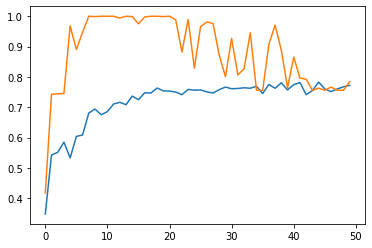

In [19]:
plt.plot(history.history['acc'][:50])
plt.plot(history.history['val_acc'][:50])

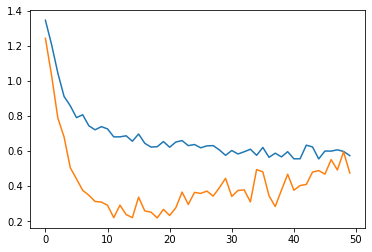

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [25]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
def result(x_test, y_test):
  y_pred = model.predict(x_test)
  y_classes = y_pred.argmax(axis=-1)
  label =  tf.keras.utils.to_categorical(np.asarray(y_classes)) 
  matrix = confusion_matrix(y_test.argmax(axis=1), label.argmax(axis=1))
  FP = np.sum(matrix.sum(axis=0) - np.diag(matrix))/4  
  FN = np.sum(matrix.sum(axis=1) - np.diag(matrix))/4
  TP = np.sum(np.diag(matrix))/4
  TN = np.sum(matrix.sum() - (FP + FN + TP))/4
  data = []
  # Overall accuracy
  accuracy = (TP+TN)/(TP+FP+FN+TN)
  data.append(accuracy)
  #Error
  error = (FP + FN)/(TP + TN + FN + FP)
  data.append(error)
  # Sensitivity, hit rate, recall, or true positive rate
  sensitivity = TP/(TP+FN)  
  data.append(sensitivity)
  # Specificity or true negative rate
  specificity = TN/(TN+FP)
  data.append(specificity)
  # Precision or positive predictive value
  precision = TP/(TP+FP)
  data.append(precision)
  # Fall out or false positive rate
  false_positive_rate = FP/(FP+TN)
  data.append(false_positive_rate)

  #F-score
  f_score = (2*(precision *sensitivity))/(precision  + sensitivity)
  data.append(f_score)
  # False discovery rate
  FDR = FP/(TP+FP)
  data.append(FDR)
  # Negative predictive value
  NPV = TN/(TN+FN)
  data.append(NPV)
  return data
test_results = result(x_test, y_test)
test_results

[0.7742482652274479,
 0.22575173477255203,
 0.7841981132075472,
 0.7633365664403492,
 0.7841981132075472,
 0.23666343355965083,
 0.7841981132075472,
 0.21580188679245282,
 0.7633365664403492]

In [0]:
train_results = result(x_train, y_train)

In [27]:
train_results

[0.7738719292835852,
 0.22612807071641483,
 0.7838050314465409,
 0.7629821159232923,
 0.7838050314465409,
 0.2370178840767076,
 0.7838050314465409,
 0.21619496855345913,
 0.7629821159232923]